<a href="https://colab.research.google.com/github/Christianah-O/Python-Practice/blob/main/customer_churn_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Problem Statement
- The goal is to predict customer churn,whether a customer is likely to leave the company service or not.
- By analyzing features like contract type, internet services, and monthly charges, we can build a model to help the company identify customers at risk and take action to retain them
- dataset is a CSV file named ‘customer_churn.cav’
- it has 7043 rows and 21 columns






In [ ]:
#get data
df = pd.read_csv('/content/Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Data Understanding

In [ ]:
#check shape
df.shape

(7043, 21)

In [ ]:
#check for the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#duplicates data
df.duplicated().sum()

np.int64(0)

In [ ]:
#we noticed our total_charges dtype is
#object instead of a number type
#needs to convert to numeric type
df.TotalCharges.unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
#convert
TC = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
TC

,TotalCharges
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.50
7039,7362.90
7040,346.45
7041,306.60


In [ ]:
#check for missing values
TC.isna().sum()

np.int64(11)

In [ ]:
#filling na with 0
df['TotalCharges'] = TC.fillna(0)

In [ ]:
df.dtypes


,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
#descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


- customer ID might be dropped because it has no relation to the prediction
- total charges data type was changed from object to float
- and it's missing values were filled
- no duplicates
- total charges will be skewed because the difference between the min and max is much


Data Exploration


<Axes: xlabel='Churn'>

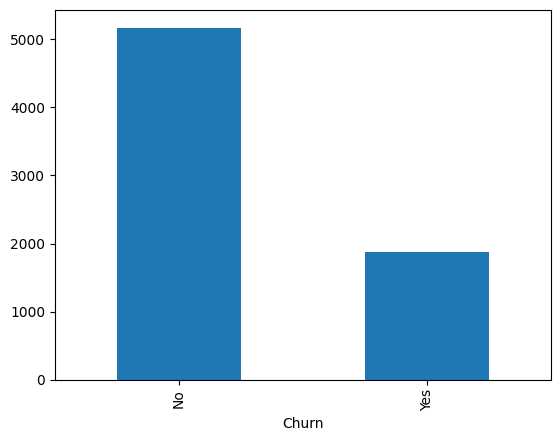

In [ ]:
# visualize target columns
df.Churn.value_counts().plot(kind='bar')



In [ ]:
df.Churn.unique()

array(['No', 'Yes'], dtype=object)

target column is not balanced, more yes than no and it needs balancing

In [ ]:
#convert our text to num
df.Churn = (df.Churn == 'Yes').astype(int)

In [ ]:
df.Churn.unique()

array([0, 1])

Data Preparation

In [ ]:
#split into features and target
x = df.drop(columns=['customerID', 'Churn'])
y = df['Churn']

In [ ]:
#split into train_test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

Data Processing

In [ ]:
#split into numerical and categorical column
num_cols = x.select_dtypes(include=np.number).columns.tolist()
cat_cols = x.select_dtypes(include='object').columns.tolist()

In [ ]:
#encoding cat_cols
from sklearn.preprocessing import OneHotEncoder, StandardScaler
encoder = OneHotEncoder(sparse_output=False).fit(df[cat_cols])
encoded_cols = list(encoder.get_feature_names_out(cat_cols))


In [ ]:
#fit on train and test
x_train[encoded_cols] = encoder.transform(x_train[cat_cols])
x_test[encoded_cols] = encoder.transform(x_test[cat_cols])


In [ ]:
#scaling num_cols
scaler = StandardScaler()

In [ ]:
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])

In [ ]:
#combine
x_train_prcd = x_train[num_cols + encoded_cols]
x_test_prcd = x_test[num_cols + encoded_cols]

Training Model


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(x_train_prcd, y_train)

LogisticRegression()

In [ ]:
train_pred = model.predict(x_train_prcd)
test_pred = model.predict(x_test_prcd)

In [ ]:
#evaluation of model
data = pd.DataFrame()
data['actual'] = y_train
data['prediction'] = train_pred
data['correct'] = data['actual'] == data['prediction']
data.sample(10)

,actual,prediction,correct
2826,0,0,True
4553,0,0,True
6299,0,0,True
5318,0,0,True
4483,0,0,True
5801,0,1,False
512,1,1,True
4258,1,0,False
3425,0,0,True
3101,0,0,True


In [ ]:
data.correct.value_counts()

,count
correct,
True,4539
False,1095


Classification Metrics

In [ ]:
#accuracy score
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(train_pred, y_train)
test_acc = accuracy_score(test_pred, y_test)



In [ ]:
train_acc, test_acc

(0.8056443024494143, 0.8055358410220014)

- training and test is 80%
- 80% correctly predicted values

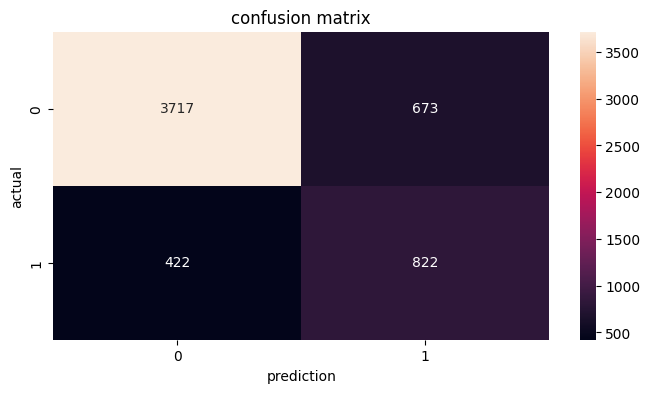

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(train_pred, y_train)
plt.figure(figsize=(8,4))
sns.heatmap(cm, annot=True, color='r', fmt='d')
plt.xlabel('prediction')
plt.ylabel('actual')
plt.title('confusion matrix')
plt.show()


In [ ]:
y_train.value_counts()

,count
Churn,
0,4139
1,1495


Use Several Models

In [ ]:
#import models & metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import(accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score)

In [ ]:
models = {
    'Log_Reg': LogisticRegression(),
    'DTC': DecisionTreeClassifier(random_state=2),
    'RFC': RandomForestClassifier(random_state=2),
    'GBC': GradientBoostingClassifier(random_state=2)
}

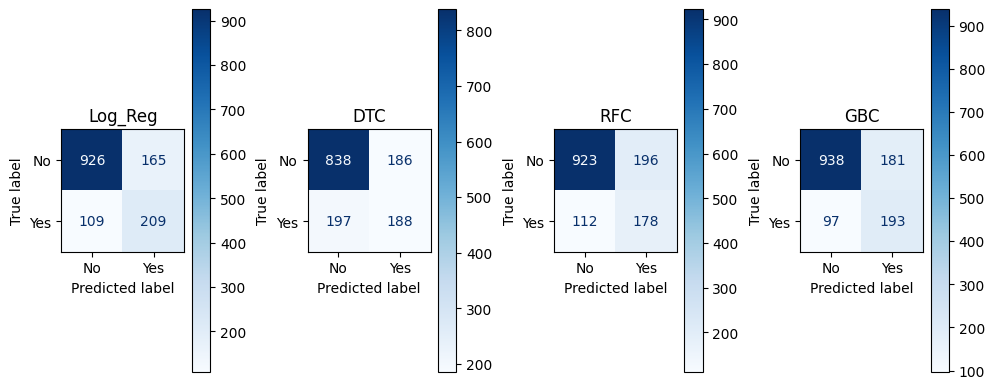


Classification Metrics
                 Log_Reg   DTC   RFC   GBC
train_acc           0.81  1.00  1.00  0.83
test_acc            0.81  0.73  0.78  0.80
precision_score     0.56  0.50  0.48  0.52
recall_score        0.66  0.49  0.61  0.67


In [ ]:
#using for loop to evaluate models
results = {}
fig, axes = plt.subplots(1, 4, figsize=(10, 4 ))
for (name, model), ax in zip(models.items(), axes.flatten()):
  #model training
  model.fit(x_train_prcd, y_train)
  #model predict
  train_pred = model.predict(x_train_prcd)
  test_pred = model.predict(x_test_prcd)
  #evaluate prediction
  train_score = accuracy_score(train_pred, y_train)
  test_score = accuracy_score(test_pred, y_test)
  precision = precision_score(test_pred, y_test)
  recall = recall_score(test_pred, y_test)
  results[name] = {
      'train_acc': train_score,
      'test_acc': test_score,
      'precision_score': precision,
      'recall_score': recall
  }
  pd.DataFrame(results)
  #plot confusion matrix
  cm = confusion_matrix(test_pred, y_test)
  disp = ConfusionMatrixDisplay(cm, display_labels=['No', 'Yes'])
  disp.plot(ax=ax, cmap='Blues')
  ax.set_title(name)

plt.tight_layout()
plt.show()

#print metrics
print('\nClassification Metrics')
metrics_df = pd.DataFrame(results)
print(metrics_df.round(2))







Logistic Regression is still the best model fit for us

In [ ]:
pd.DataFrame(results)

,Log_Reg,DTC,RFC,GBC
train_acc,0.805644,0.998048,0.998048,0.829606
test_acc,0.805536,0.728176,0.781405,0.802697
precision_score,0.558824,0.502674,0.475936,0.516043
recall_score,0.657233,0.488312,0.613793,0.665517


# Balance target column

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=2)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_prcd, y_train)


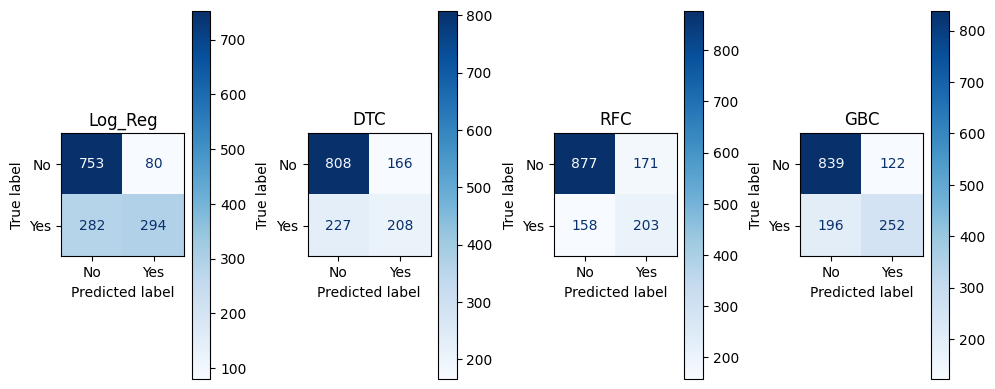


Classification Metrics
                 Log_Reg   DTC   RFC   GBC
train_acc           0.78  1.00  1.00  0.86
test_acc            0.74  0.72  0.77  0.77
precision_score     0.79  0.56  0.54  0.67
recall_score        0.51  0.48  0.56  0.56


In [ ]:
#using for loop to evaluate models
results = {}
fig, axes = plt.subplots(1, 4, figsize=(10, 4 ))
for (name, model), ax in zip(models.items(), axes.flatten()):
  #model training
  model.fit(x_train_resampled, y_train_resampled)
  #model predict
  train_pred = model.predict(x_train_resampled)
  test_pred = model.predict(x_test_prcd)
  #evaluate prediction
  train_score = accuracy_score(train_pred, y_train_resampled)
  test_score = accuracy_score(test_pred, y_test)
  precision = precision_score(test_pred, y_test)
  recall = recall_score(test_pred, y_test)
  results[name] = {
      'train_acc': train_score,
      'test_acc': test_score,
      'precision_score': precision,
      'recall_score': recall
  }
  pd.DataFrame(results)
  #plot confusion matrix
  cm = confusion_matrix(test_pred, y_test)
  disp = ConfusionMatrixDisplay(cm, display_labels=['No', 'Yes'])
  disp.plot(ax=ax, cmap='Blues')
  ax.set_title(name)

plt.tight_layout()
plt.show()

#print metrics
print('\nClassification Metrics')
metrics_df = pd.DataFrame(results)
print(metrics_df.round(2))





